In [1]:
import jupyterthemes as jt
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sklearn.preprocessing 
warnings.filterwarnings("ignore")
import tensorflow as tf
jt.jtplot.style(theme="monokai", context="notebook",grid=True,ticks=True)
if tf.config.list_physical_devices("GPU"):
    print("{}".format(tf.config.list_physical_devices("GPU")))
else:
    print("{}".format(tf.config.list_physical_devices("CPU")))

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]


In [2]:
fulfilment_center_info=pd.read_csv("fulfilment_center_info.csv")
fulfilment_center_info

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6
...,...,...,...,...,...
72,53,590,56,TYPE_A,3.8
73,30,604,56,TYPE_A,3.5
74,76,614,85,TYPE_A,3.0
75,68,676,34,TYPE_B,4.1


# Check for * _Outliers_ * in the data 
<img style="float: right;" src="images/fulfilment_center/download.png">

## First check for any outliers in the dataset. An outlier is essentially a value which is our of the range compared to the rest of the values of dataset. These values disrupt the statistical distributions of a given table. As of now, from the box plot, there are no outliers for the major feature columns in the dataset.


## Since eveything looks fine let's proceed.


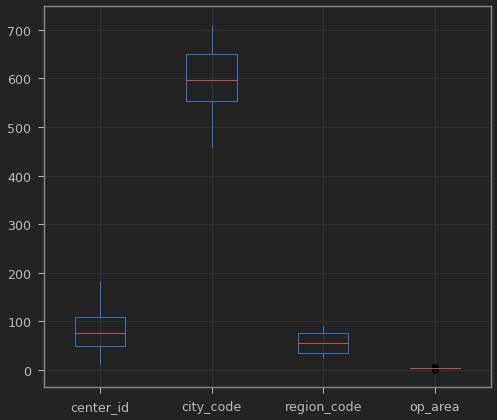

,center_id,city_code,region_code,center_type,op_area
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
72,False,False,False,False,False
73,False,False,False,False,False
74,False,False,False,False,False
75,False,False,False,False,False


In [6]:
fulfilment_center_info.boxplot()
plt.show()
fulfilment_center_info.isnull()     

# Label Encoding

## The column "CENTER" has string object as its datatype. WE can do to things:
- Do one-hot encoding and make every parameter as a separate column in the dataset
- Do label encoding and make a single column with every parameter having unique value

## To make the input dimentions as minimal as possible, better to go with label encoding.

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
fulfilment_center_info['center_type']=le.fit_transform(fulfilment_center_info["center_type"])


In [4]:
fulfilment_center_info

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,0,3.7
1,13,590,56,1,6.7
2,124,590,56,2,4.0
3,66,648,34,0,4.1
4,94,632,34,2,3.6
...,...,...,...,...,...
72,53,590,56,0,3.8
73,30,604,56,0,3.5
74,76,614,85,0,3.0
75,68,676,34,1,4.1


In [5]:
centers=fulfilment_center_info['center_type'].unique()
centers.sort()
centers_list=list(le.inverse_transform(centers))
centers_list


['TYPE_A', 'TYPE_B', 'TYPE_C']

# Model Selection
## Since we are doing muilti-class numerical prediction using single class as an attribute, the following Machine Learning Algorithms would help:
 - ### Decision Tree Regressor
 - ### Support Vector Regressor
 - ### K - Nearest Neighbours
 - ### Naive Bayes

### Seeing the size of dataset, I think * DecisionTreeRegressor* would do the job.

In [6]:
y_train=fulfilment_center_info["center_id"]
fulfilment_center_info.drop("center_id",inplace=True,axis=1)


In [7]:
x_train= fulfilment_center_info
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
y_train=np.array(y_train).reshape(-1,1)
print(y_train)
x_train=np.array(x_train)
model.fit(y_train,x_train)

[[ 11]
 [ 13]
 [124]
 [ 66]
 [ 94]
 [ 64]
 [129]
 [139]
 [ 88]
 [143]
 [101]
 [ 86]
 [ 32]
 [149]
 [152]
 [ 92]
 [ 27]
 [ 14]
 [ 26]
 [104]
 [ 77]
 [ 23]
 [ 97]
 [146]
 [113]
 [145]
 [ 80]
 [ 55]
 [186]
 [ 99]
 [ 91]
 [ 20]
 [106]
 [ 81]
 [ 73]
 [ 29]
 [ 43]
 [102]
 [ 61]
 [ 50]
 [ 83]
 [ 57]
 [126]
 [177]
 [ 67]
 [174]
 [ 59]
 [ 58]
 [ 65]
 [ 39]
 [132]
 [ 89]
 [162]
 [ 75]
 [ 72]
 [ 41]
 [ 10]
 [110]
 [ 52]
 [ 93]
 [ 74]
 [ 34]
 [137]
 [153]
 [ 24]
 [109]
 [108]
 [ 36]
 [157]
 [ 17]
 [161]
 [ 42]
 [ 53]
 [ 30]
 [ 76]
 [ 68]
 [ 51]]


DecisionTreeRegressor()

In [9]:
prediction=model.predict([[120]])
prediction=prediction.flatten()
print("city_code : {}".format(prediction[0]))
print("region_code : {}".format(prediction[1]))
print("center_type : {}".format(le.inverse_transform([int(prediction[2])])))
print("op_area : {}".format(prediction[3]))

city_code : 590.0
region_code : 56.0
center_type : ['TYPE_C']
op_area : 4.0


## Save Model
### Save the model using *joblib.

In [ ]:
from joblib import dump
dump(model,'fulfilment_center_predictor.pkl')
